In [ ]:
import math
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'academic/graduate/courses/1. fall 2023/cs760/hw3/data'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

Mounted at /content/drive


In [ ]:
data = np.loadtxt(GOOGLE_DRIVE_PATH + "/D2z.txt")
data.shape

(200, 3)

In [ ]:
def sortSecond(val):
    return val[0]

In [ ]:
# this class only works with data of the form (x1, x2, y) where x1 and x2 are features and y is a class label

class kNN_classifier():
  def __init__(self, dataset):
    self.dataset = dataset

  def classify(self, k, x):

    x1_classify = x[0]
    x2_classify = x[1]

    # populate list with k -1s
    distances_with_label = []

    # calculate distance to x from every data point
    distances = np.sqrt((self.dataset[:,1] - x2_classify)**2+(self.dataset[:,0] - x1_classify)**2)

    # append distance, label to list
    for i in range(len(self.dataset)):
      distances_with_label.append((distances[i], self.dataset[i][-1]))

    # print(distances_with_label)
    distances_with_label.sort(key=sortSecond)
    # print(distances_with_label)

    # return majority vote
    knn = distances_with_label[:k]
    # print(knn)
    positive_count = 0
    negative_count = 0
    for i in range(len(knn)):
      if knn[i][-1] == 1:
        positive_count += 1
      elif knn[i][-1] == 0:
        negative_count += 1
    return 1 if positive_count >= negative_count else 0




In [ ]:
my_classifier = kNN_classifier(data)
my_classifier.classify(10, np.array([-0.333338, -0.0871707]))

0

# 2. Programming

## Question 1

In [ ]:
# create numpy array of all points in plot
all_points = []

for i in np.arange(-2, 2.1, 0.1):
  for j in np.arange(-2, 2.1, 0.1):
    all_points.append([round(i, 2), round(j, 2)])
all_points = np.array(all_points)

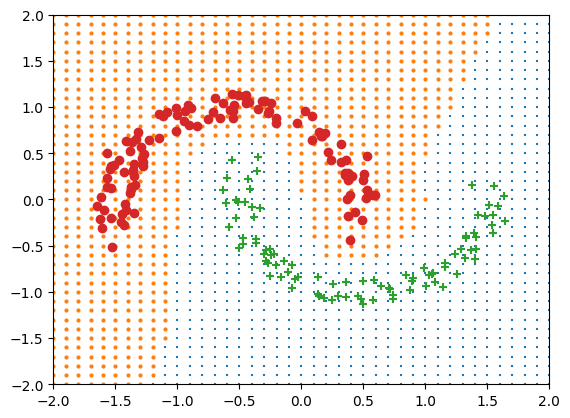

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)



# getting predicted classes
predicted_classes = []
my_classifier = kNN_classifier(data)
for i in range(all_points.shape[0]):
  predicted_classes.append(my_classifier.classify(1, all_points[i]))
predicted_classes = np.array([predicted_classes])

predicted_classes = predicted_classes.reshape(1681, -1)
all_data = np.append(all_points, predicted_classes, 1)

sorted_data = all_data[all_data[:, -1].argsort()]

split = np.split(sorted_data[:,:], np.unique(sorted_data[:, -1], return_index=True)[1][1:])


# plotting predicted data points
m = ['+', 'o']
for i in range(len(split)):
    ax.scatter(split[i][:,0], split[i][:,1], marker = m[i], zorder = 1, s = 4)

# splitting training dataset by y label
sorted_data = data[data[:, -1].argsort()]

split = np.split(sorted_data[:,:], np.unique(sorted_data[:, -1], return_index=True)[1][1:])

# plotting training data points
m = ['+', 'o']
for i in range(len(split)):
    ax.scatter(split[i][:,0], split[i][:,1], marker = m[i], zorder = 10)

plt.show()

## Question 2

In [ ]:
from numpy import genfromtxt
email_data_uncleaned = genfromtxt(GOOGLE_DRIVE_PATH + "/emails.csv", delimiter=',')

In [ ]:
email_data = email_data_uncleaned[1:,1:]

In [ ]:
# this class works with data of the form (x1, x2, ..., x3000, y) where x1 ... x3000 are features and y is a class label

class kNN_classifier():
  def __init__(self, dataset):
    self.dataset = dataset

  def classify(self, k, x):
    """
    k -- # of nearest neighbors
    x -- 1 x 3000 feature row
    """

    # populate list with k -1s
    distances_with_label = []

    # calculate distance to x from every data point
    distances = np.sqrt(np.sum((self.dataset[:, :-1] - x)**2, axis=1))

    # append distance, label to list
    for i in range(len(self.dataset)):

      distances_with_label.append((distances[i], self.dataset[i][-1]))

    distances_with_label.sort(key=sortSecond)
    # print(distances_with_label[:k])

    # return majority vote
    knn = distances_with_label[:k]

    positive_count = 0
    negative_count = 0
    for i in range(len(knn)):
      if knn[i][-1] == 1:
        positive_count += 1
      elif knn[i][-1] == 0:
        negative_count += 1
    # if k == 10:
    #   print(knn)
    #   print("1" if positive_count >= negative_count else "0")
    return 1 if positive_count > negative_count else 0

  def evaluate(self, matrix_with_predictions, test_set):
    true_negatives = 0
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(matrix_with_predictions)):
      if matrix_with_predictions[i] == 0:
        if matrix_with_predictions[i] == test_set[i][-1]:
          true_negatives += 1
        else:
          false_negatives += 1
      elif matrix_with_predictions[i] == 1:
        if matrix_with_predictions[i] == test_set[i][-1]:
          true_positives += 1
        else:
          false_positives += 1

    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    return accuracy, precision, recall

In [ ]:
my_classifier = kNN_classifier(email_data)
my_classifier.classify(10, email_data[0,:-1].reshape(1,-1))

0

In [ ]:
my_classifier = kNN_classifier(data)
my_classifier.classify(1, data[-2,:-1].reshape(1,-1))

1

In [ ]:
email_data.shape

(5000, 3001)

In [ ]:
set_1 = email_data[:1000]
set_2 = email_data[1000:2000]
set_3 = email_data[2000:3000]
set_4 = email_data[3000:4000]
set_5 = email_data[4000:]

In [ ]:
set_1.shape, set_2.shape, set_5.shape

((1000, 3001), (1000, 3001), (1000, 3001))

In [ ]:
test_set_1 = set_1
train_set_1 = np.concatenate((set_2, set_3, set_4, set_5))
test_set_1.shape, train_set_1.shape

((1000, 3001), (4000, 3001))

In [ ]:
test_set_2 = set_2
train_set_2 = np.concatenate((set_1, set_3, set_4, set_5))
test_set_2.shape, train_set_2.shape

((1000, 3001), (4000, 3001))

In [ ]:
test_set_3 = set_3
train_set_3 = np.concatenate((set_1, set_2, set_4, set_5))
test_set_3.shape, train_set_3.shape

((1000, 3001), (4000, 3001))

In [ ]:
test_set_4 = set_4
train_set_4 = np.concatenate((set_1, set_2, set_3, set_5))
test_set_4.shape, train_set_4.shape

((1000, 3001), (4000, 3001))

In [ ]:
test_set_5 = set_5
train_set_5 = np.concatenate((set_1, set_2, set_3, set_4))
test_set_5.shape, train_set_5.shape

((1000, 3001), (4000, 3001))

In [ ]:
my_classifier = kNN_classifier(train_set_1)
classifications = []
for i in range(len(test_set_1)):
  classifications.append(my_classifier.classify(1, test_set_1[i,:-1].reshape(1,-1)))

In [ ]:
my_classifier.evaluate(classifications, test_set_1)

(0.825, 0.6544943820224719, 0.8175438596491228)

In [ ]:
my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(1, test_set_2[i,:-1].reshape(1,-1)))

my_classifier.evaluate(classifications, test_set_2)

(0.853, 0.6857142857142857, 0.8664259927797834)

In [ ]:
my_classifier = kNN_classifier(train_set_3)
classifications = []
for i in range(len(test_set_3)):
  classifications.append(my_classifier.classify(1, test_set_3[i,:-1].reshape(1,-1)))

my_classifier.evaluate(classifications, test_set_3)

(0.862, 0.7212121212121212, 0.8380281690140845)

In [ ]:
my_classifier = kNN_classifier(train_set_4)
classifications = []
for i in range(len(test_set_4)):
  classifications.append(my_classifier.classify(1, test_set_4[i,:-1].reshape(1,-1)))

my_classifier.evaluate(classifications, test_set_4)

(0.851, 0.7164179104477612, 0.8163265306122449)

In [ ]:
my_classifier = kNN_classifier(train_set_5)
classifications = []
for i in range(len(test_set_5)):
  classifications.append(my_classifier.classify(1, test_set_5[i,:-1].reshape(1,-1)))

my_classifier.evaluate(classifications, test_set_5)

(0.775, 0.6057441253263708, 0.7581699346405228)

## Question 5 (Question section)

In [ ]:
false_positive_rates = np.array([0, 0, 0, 0.25, 0.25, 0.5, 0.5, 1])
true_positive_rates = np.array([0, (1/6), (1/3), (1/3), (2/3), (2/3), 1, 1])

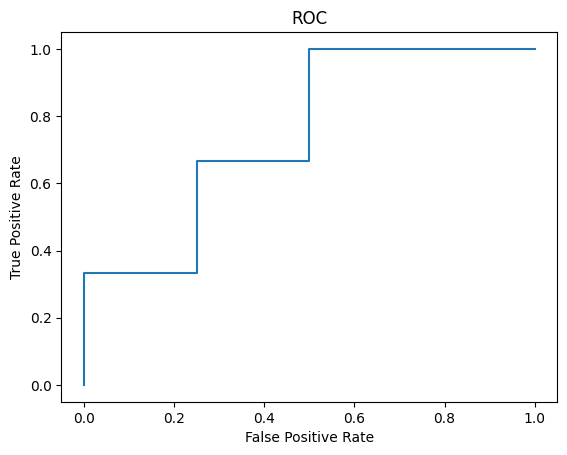

In [ ]:
plt.plot(false_positive_rates, true_positive_rates)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Question 4

In [ ]:
from sklearn.metrics import accuracy_score

In [39]:
k_1_accuracies = []
k_3_accuracies = []
k_5_accuracies = []
k_7_accuracies = []
k_10_accuracies = []

In [40]:
# k = 1

my_classifier = kNN_classifier(train_set_1)
classifications = []
for i in range(len(test_set_1)):
  classifications.append(my_classifier.classify(1, test_set_1[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_1)
k_1_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(1, test_set_2[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_2)

k_1_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_3)
classifications = []
for i in range(len(test_set_3)):
  classifications.append(my_classifier.classify(1, test_set_3[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_3)

k_1_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_4)
classifications = []
for i in range(len(test_set_4)):
  classifications.append(my_classifier.classify(7, test_set_4[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_4)

k_1_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_5)
classifications = []
for i in range(len(test_set_5)):
  classifications.append(my_classifier.classify(10, test_set_5[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_5)

k_1_accuracies.append(accuracy)

In [41]:
# k = 3
k = 3
my_classifier = kNN_classifier(train_set_1)
classifications = []
for i in range(len(test_set_1)):
  classifications.append(my_classifier.classify(k, test_set_1[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_1)
k_3_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(k, test_set_2[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_2)

k_3_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_3)
classifications = []
for i in range(len(test_set_3)):
  classifications.append(my_classifier.classify(k, test_set_3[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_3)

k_3_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_4)
classifications = []
for i in range(len(test_set_4)):
  classifications.append(my_classifier.classify(k, test_set_4[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_4)

k_3_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_5)
classifications = []
for i in range(len(test_set_5)):
  classifications.append(my_classifier.classify(k, test_set_5[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_5)

k_3_accuracies.append(accuracy)

In [42]:
# k = 5
k = 5

my_classifier = kNN_classifier(train_set_1)
classifications = []
for i in range(len(test_set_1)):
  classifications.append(my_classifier.classify(k, test_set_1[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_1)
k_5_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(k, test_set_2[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_2)

k_5_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_3)
classifications = []
for i in range(len(test_set_3)):
  classifications.append(my_classifier.classify(k, test_set_3[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_3)

k_5_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_4)
classifications = []
for i in range(len(test_set_4)):
  classifications.append(my_classifier.classify(k, test_set_4[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_4)

k_5_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_5)
classifications = []
for i in range(len(test_set_5)):
  classifications.append(my_classifier.classify(k, test_set_5[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_5)

k_5_accuracies.append(accuracy)

In [43]:
# k = 7
k = 7

my_classifier = kNN_classifier(train_set_1)
classifications = []
for i in range(len(test_set_1)):
  classifications.append(my_classifier.classify(k, test_set_1[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_1)
k_7_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(k, test_set_2[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_2)

k_7_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_3)
classifications = []
for i in range(len(test_set_3)):
  classifications.append(my_classifier.classify(k, test_set_3[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_3)

k_7_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_4)
classifications = []
for i in range(len(test_set_4)):
  classifications.append(my_classifier.classify(k, test_set_4[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_4)

k_7_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_5)
classifications = []
for i in range(len(test_set_5)):
  classifications.append(my_classifier.classify(k, test_set_5[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_5)

k_7_accuracies.append(accuracy)

In [44]:
# k = 10
k = 10

my_classifier = kNN_classifier(train_set_1)
classifications = []
for i in range(len(test_set_1)):
  classifications.append(my_classifier.classify(k, test_set_1[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_1)
k_10_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(k, test_set_2[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_2)

k_10_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_3)
classifications = []
for i in range(len(test_set_3)):
  classifications.append(my_classifier.classify(k, test_set_3[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_3)

k_10_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_4)
classifications = []
for i in range(len(test_set_4)):
  classifications.append(my_classifier.classify(k, test_set_4[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_4)

k_10_accuracies.append(accuracy)


my_classifier = kNN_classifier(train_set_5)
classifications = []
for i in range(len(test_set_5)):
  classifications.append(my_classifier.classify(k, test_set_5[i,:-1].reshape(1,-1)))

accuracy, _, _ = my_classifier.evaluate(classifications, test_set_5)

k_10_accuracies.append(accuracy)

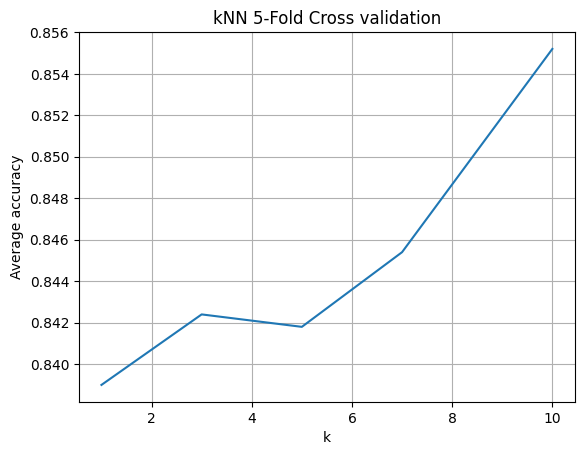

In [45]:
x = [1, 3, 5, 7, 10]
y = [sum(k_1_accuracies)/5, sum(k_3_accuracies)/5, sum(k_5_accuracies)/5, sum(k_7_accuracies)/5, sum(k_10_accuracies)/5]
plt.ylabel("Average accuracy")
plt.xlabel("k")
plt.title("kNN 5-Fold Cross validation")
plt.plot(x, y)
plt.grid(True)

plt.show()

In [46]:
y

[0.8390000000000001, 0.8423999999999999, 0.8417999999999999, 0.8454, 0.8552]